**RETAIL STORE ANALYSIS**



PROBLEM STATEMENT:
1. To analyse the sales of retail store.
2. Predict the sales.
3. Give possible suggestions for the store owner.

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\scanner_data.csv\scanner_data.csv")
data.head()


,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


In [3]:
data.dtypes

Unnamed: 0          int64
Date               object
Customer_ID         int64
Transaction_ID      int64
SKU_Category       object
SKU                object
Quantity          float64
Sales_Amount      float64
dtype: object

In [4]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,131706.0,NaN,NaN,NaN,65853.5,38020.391614,1.0,32927.25,65853.5,98779.75,131706.0
Date,131706,363,23/09/2016,638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,131706.0,NaN,NaN,NaN,12386.450367,6086.447552,1.0,7349.0,13496.0,17306.0,22625.0
Transaction_ID,131706.0,NaN,NaN,NaN,32389.604187,18709.901238,1.0,16134.0,32620.0,48548.0,64682.0
SKU_Category,131706,187,N8U,10913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,131706,5242,UNJKW,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,131706.0,NaN,NaN,NaN,1.485311,3.872667,0.01,1.0,1.0,1.0,400.0
Sales_Amount,131706.0,NaN,NaN,NaN,11.981524,19.359699,0.02,4.23,6.92,12.33,707.73


Dropping unique identifiers

In [5]:
df = data.drop(data.columns[0],axis=1)
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88


Convert to categories

In [6]:
for col in ['SKU_Category','SKU']:
    df[col] = df[col].astype('category')

df.dtypes


Date                object
Customer_ID          int64
Transaction_ID       int64
SKU_Category      category
SKU               category
Quantity           float64
Sales_Amount       float64
dtype: object

Convert Date to date time feature

In [7]:
df.Date = pd.to_datetime(df.Date,format='%d/%m/%Y')
df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [8]:
df["Month"] = df.Date.dt.month
df["Day"] = df.Date.dt.day
df["Day_Of_Week"] = df.Date.dt.day_of_week
df["Day_Name"] = df.Date.dt.day_name().astype('category')
days = df[['Day_Name','Day_Of_Week']].drop_duplicates().reset_index()['Day_Name']
df["Day_Name"] = df["Day_Name"].cat.reorder_categories(days.to_list())
df["Month_Name"] = df.Date.dt.month_name().astype('category')
months = df[['Month_Name','Month']].drop_duplicates().reset_index()['Month_Name']
df["Month_Name"] = df["Month_Name"].cat.reorder_categories(months.to_list())

df.head()

,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount,Month,Day,Day_Of_Week,Day_Name,Month_Name
0,2016-01-02,2547,1,X52,0EM7L,1.0,3.13,1,2,5,Saturday,January
1,2016-01-02,822,2,2ML,68BRQ,1.0,5.46,1,2,5,Saturday,January
2,2016-01-02,3686,3,0H2,CZUZX,1.0,6.35,1,2,5,Saturday,January
3,2016-01-02,3719,4,0H2,549KK,1.0,5.59,1,2,5,Saturday,January
4,2016-01-02,9200,5,0H2,K8EHH,1.0,6.88,1,2,5,Saturday,January


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,131706,NaN,NaN,NaN,2016-07-04 18:00:03.608036096,2016-01-02 00:00:00,2016-04-05 00:00:00,2016-07-02 00:00:00,2016-10-07 00:00:00,2016-12-31 00:00:00,NaN
Customer_ID,131706.0,NaN,NaN,NaN,12386.450367,1.0,7349.0,13496.0,17306.0,22625.0,6086.447552
Transaction_ID,131706.0,NaN,NaN,NaN,32389.604187,1.0,16134.0,32620.0,48548.0,64682.0,18709.901238
SKU_Category,131706,187,N8U,10913,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,131706,5242,UNJKW,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,131706.0,NaN,NaN,NaN,1.485311,0.01,1.0,1.0,1.0,400.0,3.872667
Sales_Amount,131706.0,NaN,NaN,NaN,11.981524,0.02,4.23,6.92,12.33,707.73,19.359699
Month,131706.0,NaN,NaN,NaN,6.623791,1.0,4.0,7.0,10.0,12.0,3.472462
Day,131706.0,NaN,NaN,NaN,15.645506,1.0,8.0,16.0,23.0,31.0,8.509053
Day_Of_Week,131706.0,NaN,NaN,NaN,2.657548,0.0,1.0,3.0,4.0,6.0,1.820095


**EDA**

In [10]:
df.Customer_ID.nunique()

22625

In [36]:
def barplot_with_percentage(data,x_label,y_label,figsize=(9,5)):
    plt.figure(figsize=figsize)
    g = sns.barplot(data,x=x_label,y=y_label)
    g.set_xticklabels(labels=data[x_label].to_list(), rotation=90)

    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height() + 0.1
        g.text(txt_x,txt_y,txt)

plt.show()

SKU Categories

In [12]:
df.SKU_Category.value_counts(normalize=True).head()

SKU_Category
N8U    0.082859
R6E    0.038715
LPF    0.038434
P42    0.036718
U5F    0.034698
Name: proportion, dtype: float64

In [13]:
df.SKU_Category.value_counts().tail()

SKU_Category
7MA    3
U3N    2
2JO    1
OTK    1
QON    1
Name: count, dtype: int64

In [14]:
df.SKU.value_counts().head()

SKU
UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
Name: count, dtype: int64

In [15]:
df.SKU.value_counts().tail()

SKU
TQGGG    1
TQ58U    1
TPKG7    1
FR26V    1
ZZX6K    1
Name: count, dtype: int64

Date

In [16]:
df.Date.value_counts()

Date
2016-09-23    638
2016-12-15    614
2016-09-22    606
2016-05-13    602
2016-12-16    594
             ... 
2016-07-31    128
2016-01-03    111
2016-08-28    107
2016-12-24    100
2016-03-28     73
Name: count, Length: 363, dtype: int64

In [17]:
by_day_of_week = (df.Day_Name.value_counts(normalize=True,sort=False) * 100).reset_index()
by_day_of_week.columns = ['Day_Name','Percentage']

by_day_of_week

,Day_Name,Percentage
0,Saturday,10.907628
1,Sunday,6.851624
2,Monday,15.656842
3,Tuesday,15.810214
4,Wednesday,15.788195
5,Thursday,17.221691
6,Friday,17.763807


C:\Users\admin\AppData\Local\Temp\ipykernel_16188\2432454399.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=data[x_label].to_list(), rotation=90)


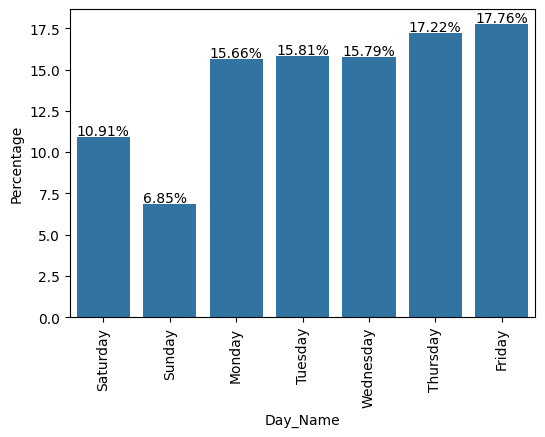

In [18]:
barplot_with_percentage(by_day_of_week,'Day_Name','Percentage',figsize=(6,4))

In [19]:
totals_by_day = df.loc[:,['Day_Name','Sales_Amount']].groupby('Day_Name').sum('Sales_Amount').reset_index()
totals_by_day.columns = ['Day_Name','Total_Sales']
total = totals_by_day.Total_Sales.sum()
totals_by_day.Total_Sales = totals_by_day.Total_Sales / total * 100
totals_by_day

C:\Users\admin\AppData\Local\Temp\ipykernel_16188\89347385.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals_by_day = df.loc[:,['Day_Name','Sales_Amount']].groupby('Day_Name').sum('Sales_Amount').reset_index()


,Day_Name,Total_Sales
0,Saturday,9.602983
1,Sunday,5.342246
2,Monday,15.492405
3,Tuesday,16.410937
4,Wednesday,16.793778
5,Thursday,17.641737
6,Friday,18.715914


C:\Users\admin\AppData\Local\Temp\ipykernel_16188\2432454399.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=data[x_label].to_list(), rotation=90)


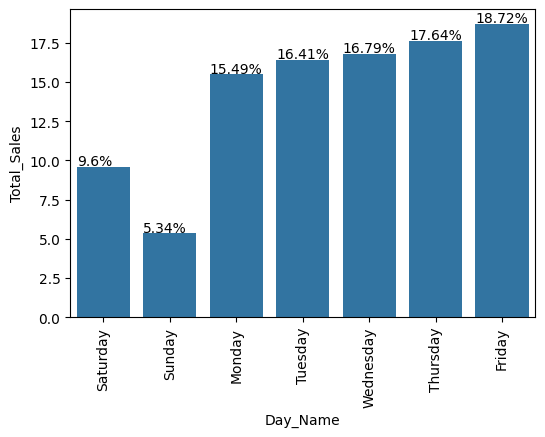

In [20]:
barplot_with_percentage(totals_by_day,'Day_Name','Total_Sales',figsize=(6,4))

Month

In [21]:
by_month = (df.Month_Name.value_counts(normalize=True,sort=False) * 100).reset_index()
by_month.columns = ['Month_Name','Transactions']

by_month

,Month_Name,Transactions
0,January,7.590391
1,February,7.905486
2,March,8.249434
3,April,8.611605
4,May,9.189407
5,June,8.093025
6,July,7.443852
7,August,7.276054
8,September,8.872033
9,October,8.859126


C:\Users\admin\AppData\Local\Temp\ipykernel_16188\2432454399.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=data[x_label].to_list(), rotation=90)


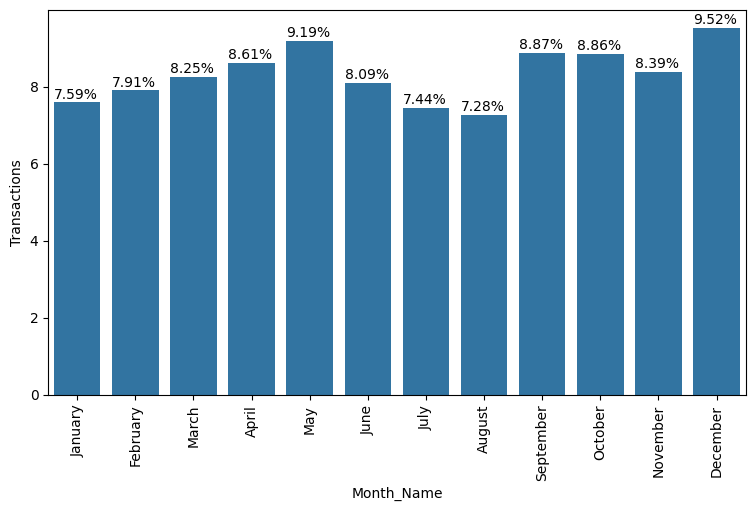

In [22]:
barplot_with_percentage(by_month,'Month_Name','Transactions')

In [23]:
totals_by_month = df.loc[:,['Month_Name','Sales_Amount']].groupby('Month_Name').sum('Sales_Amount').reset_index()
totals_by_month.columns = ['Month_Name','Total_Sales']
total = totals_by_month.Total_Sales.sum()
totals_by_month.Total_Sales = totals_by_month.Total_Sales / total * 100
totals_by_month

C:\Users\admin\AppData\Local\Temp\ipykernel_16188\1640589603.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  totals_by_month = df.loc[:,['Month_Name','Sales_Amount']].groupby('Month_Name').sum('Sales_Amount').reset_index()


,Month_Name,Total_Sales
0,January,7.046740
1,February,7.738379
2,March,8.106553
3,April,8.755940
4,May,9.044130
5,June,8.320794
6,July,7.641890
7,August,7.408499
8,September,8.950344
9,October,8.925859


C:\Users\admin\AppData\Local\Temp\ipykernel_16188\2432454399.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels=data[x_label].to_list(), rotation=90)


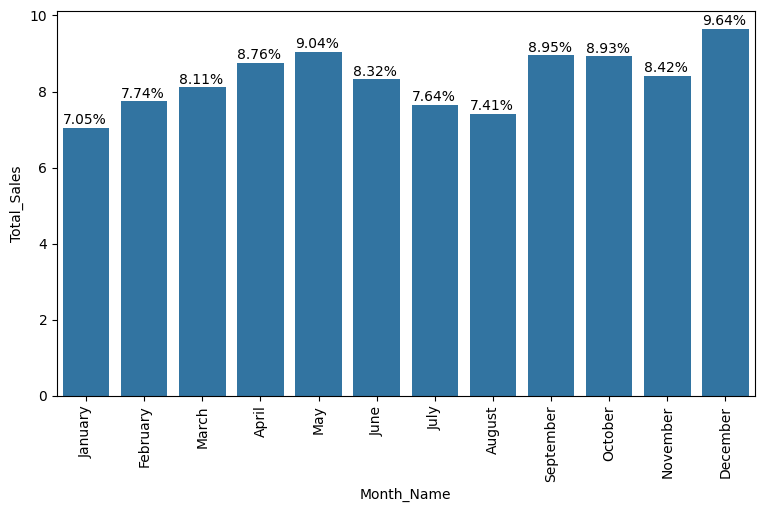

In [24]:
barplot_with_percentage(totals_by_month,'Month_Name','Total_Sales')

December saw highest in total sales followed by May accounting for 9.64% and 9.04% of total sales.

January had the lowest in total sales followed by Auguest accounting for 7.05% and 7.41% of total sales.

Popular SKU by day of week

In [25]:
df.loc[:,['Day_Name','SKU']].groupby('Day_Name').value_counts().groupby(level=0, group_keys=False).head(3)

C:\Users\admin\AppData\Local\Temp\ipykernel_16188\808967397.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[:,['Day_Name','SKU']].groupby('Day_Name').value_counts().groupby(level=0, group_keys=False).head(3)
C:\Users\admin\AppData\Local\Temp\ipykernel_16188\808967397.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[:,['Day_Name','SKU']].groupby('Day_Name').value_counts().groupby(level=0, group_keys=False).head(3)


Day_Name   SKU  
Saturday   UNJKW    290
           COWU2    131
           OV1P9    130
Sunday     UNJKW    201
           OV1P9    106
           M6J9W     78
Monday     UNJKW    299
           CZUZX    119
           C6TXL    116
Tuesday    UNJKW    280
           TL4WZ    131
           C6TXL    130
Wednesday  UNJKW    267
           C6TXL    113
           DWJC4    113
Thursday   UNJKW    347
           COWU2    143
           C6TXL    138
Friday     UNJKW    323
           QGK3S    131
           C6TXL    128
Name: count, dtype: int64

Popular SKUs by Month

In [26]:
df.loc[:,['Month_Name','SKU']].groupby('Month_Name').value_counts().groupby(level=0, group_keys=False).head(2)

C:\Users\admin\AppData\Local\Temp\ipykernel_16188\4275028834.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[:,['Month_Name','SKU']].groupby('Month_Name').value_counts().groupby(level=0, group_keys=False).head(2)
C:\Users\admin\AppData\Local\Temp\ipykernel_16188\4275028834.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.loc[:,['Month_Name','SKU']].groupby('Month_Name').value_counts().groupby(level=0, group_keys=False).head(2)


Month_Name  SKU  
January     UNJKW    167
            OV1P9     93
February    UNJKW    190
            COWU2    116
March       UNJKW    178
            COWU2    121
April       UNJKW    151
            M6J9W    148
May         UNJKW    124
            F79YP     82
June        UNJKW    112
            7TUN3     68
July        UNJKW    122
            M6J9W    106
August      UNJKW    109
            M6J9W     76
September   UNJKW    173
            OV1P9     85
October     UNJKW    235
            7GQRJ    103
November    UNJKW    175
            DWJC4     59
December    UNJKW    271
            E3PAN    105
Name: count, dtype: int64

Transactions

In [27]:
df.Transaction_ID.nunique()

64682

In [28]:
df.loc[:,['Transaction_ID','Sales_Amount']].groupby('Transaction_ID').sum().reset_index().sort_values('Sales_Amount')

,Transaction_ID,Sales_Amount
54016,54017,0.03
36185,36186,0.06
31140,31141,0.08
38483,38484,0.08
9260,9261,0.11
...,...,...
5240,5241,610.43
16270,16271,645.59
63977,63978,649.06
38843,38844,662.42


In [29]:
df.loc[:,['Transaction_ID','SKU']].groupby('Transaction_ID').count().reset_index().sort_values('SKU')

,Transaction_ID,SKU
0,1,1
35939,35940,1
35941,35942,1
35942,35943,1
35945,35946,1
...,...,...
28730,28731,19
34203,34204,19
42294,42295,20
19097,19098,21


SKU by counts

In [30]:
df[['SKU','Quantity','Sales_Amount']].groupby('SKU').sum().reset_index().sort_values('Quantity')

C:\Users\admin\AppData\Local\Temp\ipykernel_16188\3526503242.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['SKU','Quantity','Sales_Amount']].groupby('SKU').sum().reset_index().sort_values('Quantity')


,SKU,Quantity,Sales_Amount
1935,D0APX,0.10,69.38
5136,Z8IA4,0.20,117.00
3183,LJSFV,0.30,1.02
4916,XMHTE,0.33,12.59
4955,XY1DR,0.33,9.98
...,...,...,...
3370,MXKDP,1252.00,313.08
2134,EEI1Q,1568.00,515.37
4504,UNJKW,2179.00,4526.28
4302,TD3DD,3786.00,1039.12


SKU by Sales Amount

In [31]:
df[['SKU','Quantity','Sales_Amount']].groupby('SKU').sum().reset_index().sort_values('Sales_Amount')

C:\Users\admin\AppData\Local\Temp\ipykernel_16188\1820389901.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[['SKU','Quantity','Sales_Amount']].groupby('SKU').sum().reset_index().sort_values('Sales_Amount')


,SKU,Quantity,Sales_Amount
3410,N5SN2,1.0,0.03
440,2YFJL,1.0,0.04
2793,IZNPV,2.0,0.04
4514,UP0YH,3.0,0.06
664,4F50E,3.0,0.11
...,...,...,...
621,44RUE,218.0,8942.63
2071,DWJC4,823.0,10592.09
2752,IRQZ4,321.0,11681.63
3178,LJ26I,632.0,13571.45


Customer Loyalty

In [32]:
loyalty = (
    df.loc[:,['Customer_ID','Transaction_ID']]
    .drop_duplicates()
    .groupby('Customer_ID')
    .count()
    .reset_index()
    .sort_values('Transaction_ID')
    .groupby('Transaction_ID')
    .count()
    .reset_index()
)
loyalty.columns = ['Transaction_Count','Customers']
loyalty.head()

,Transaction_Count,Customers
0,1,11535
1,2,4200
2,3,2088
3,4,1282
4,5,831


In [33]:
loyalty.tail() 

,Transaction_Count,Customers
50,81,1
51,82,1
52,94,1
53,96,1
54,99,1


Most purchased SKU by Customer

In [34]:
(
    df[['Customer_ID','SKU','Quantity']]
    .groupby(['Customer_ID','SKU'])
    .sum()
    .reset_index()
    .sort_values('Quantity')
)

C:\Users\admin\AppData\Local\Temp\ipykernel_16188\2388671113.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Customer_ID','SKU'])


,Customer_ID,SKU,Quantity
0,1,00GVC,0.0
79043086,15079,SN48W,0.0
79043085,15079,SN43A,0.0
79043084,15079,SN3ZJ,0.0
79043083,15079,SMGDT,0.0
...,...,...,...
88064660,16800,TD3DD,366.0
93068397,17755,CYRX4,368.0
91582679,17471,XT0W3,370.0
103741039,19791,CKDW0,400.0


Most spent on a SKU by Customer

In [35]:
(
    df[['Customer_ID','SKU','Sales_Amount']]
    .groupby(['Customer_ID','SKU'])
    .sum()
    .reset_index()
    .sort_values('Sales_Amount')
) 

C:\Users\admin\AppData\Local\Temp\ipykernel_16188\2847921185.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['Customer_ID','SKU'])


MemoryError: Unable to allocate 905. MiB for an array with shape (118600250, 1) and data type int64

Unit Price for SKU

In [ ]:
df['Unit_Price'] = df['Sales_Amount'] / df['Quantity'] 
by_sku = df[['SKU','Unit_Price']].groupby('SKU')
by_sku.min().reset_index().sort_values('Unit_Price').head()

In [ ]:
by_sku.max().reset_index().sort_values('Unit_Price').tail()

SKU counts in SKU Categories

In [ ]:
(
    df[['SKU_Category','SKU']]
    .drop_duplicates()
    .groupby('SKU_Category')
    .count()
    .reset_index()
    .sort_values('SKU')
)